# Truncated Multivariate Normal

## Bivariate Normal

Let $x$ and $y$ be distributed as a bivariate normal distribution, with means $\mu_1$ and $\mu_2$, standard deviations $\sigma_1$ and $\sigma_2$, and scale-free measure of correlation $r=\text{Cov}(x,y)/\sigma_x\sigma_y$.

Then the probability density is given by

$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-r^2}}\exp\left[ -\frac{1}{2(1-r^2)}\left[ \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - \frac{2r(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y} \right] \right]$

Selection intensity is given by:

intensity $ = \frac{\phi\left (\Phi^{-1}(1-\xi) \right)}{\xi}$, where

$\xi = z/100$ is the fraction of the population selected ($z$ is percent)

$\phi(x)$ is the Probability Density Function (PDF) for a normal distribution \
  $\phi(x) = $ dnorm in R  
  
$\Phi(x)$ is the Cumulative Density Function (CDF) for a normal distribution \
  $\Phi(x) = $ pnorm in R 
  
$\Phi^{-1}(x)$ is the Quantile for a normal distribution \
  $\Phi^{-1}(x) = $ qnorm in R

## Matrix Formulation for Multivariate Normal

Let the $m$ variables ${\bf X}=[x_1,x_2,\dots,x_m]$ follow a multivariate normal distribution, with means ${\bf\mu}=[\mu_1,\mu_2,\dots,\mu_m]$, and $m\times m$ correlation matrix ${\bf\Sigma}=\Sigma_{i,j}=\text{Cov}(x_i,x_j)$.

Then the probability density is given by

$f({\bf X}) = \frac{1}{\sqrt{(2\pi)^m|{\bf \Sigma}|}} \exp\left[ -\frac{1}{2}\left({\bf X}-{\bf \mu}\right)^T {\bf \Sigma}^{-1}\left({\bf X}-{\bf \mu}\right)  \right]$

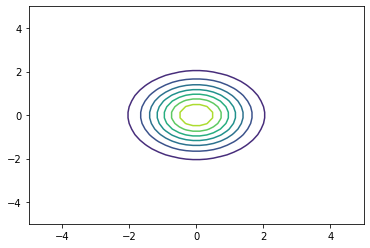

In [13]:
import numpy as np


def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

def test_gauss_pdf():
    x = np.array([[0],[0]])
    mu  = np.array([[0],[0]])
    cov = np.eye(2) 

    print("PDF_MVN 1")
    print(pdf_multivariate_gauss(x, mu, cov))
    print("=====")
    
    print("PDF_MVN 2")
    var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
    print(var.pdf([1,0]))
    print("-----")
    x  = x.reshape((2,))
    mu = mu.reshape((2,))
    var = multivariate_normal(mean=mu, cov=cov)
    print(var.pdf(x))
    
    
from scipy.stats import multivariate_normal
#test_gauss_pdf()
    

    
# make plot of 2D distribution

#x = np.array([[0],[0]])
#mu  = np.array([[0],[0]])
#cov = np.eye(2) 

#x  = x.reshape((2,))
#mu = mu.reshape((2,))
#var = multivariate_normal(mean=mu, cov=cov)
#print(var.pdf(x))

#x1 = 0
#x2 = 0

X = np.array([x1,x2])
Mu = np.array([0,0])
Cov = np.eye(2)

MVNdist = multivariate_normal(mean=Mu, cov=Cov)
#z = MVNdist.pdf(X)

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 40)

xs, ys= np.meshgrid(x, y)

z = MVNdist.pdf(np.dstack((xs,ys)))
#print(z)

import matplotlib.pyplot as plt 

plt.contour(x,y,z)
plt.show()





In [ ]:

    
# from scipy.stats import multivariate_normal
# var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
# var.pdf([1,0])
# 
# 
# 
# from scipy.stats import multivariate_normal
# x = np.linspace(0, 5, 10, endpoint=False)
# y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)
# 
# #y
# #y([ 0.00108914,  0.01033349,  0.05946514,  0.20755375,  0.43939129,
# #    0.56418958,  0.43939129,  0.20755375,  0.05946514,  0.01033349])
# 
# plt.plot(x, y)
# 
# 
# 
# def truncatedMVN(X,Mu,Std,Cov):
#     """
#     Multivariate Normal Distribution 
#     
#     X = Random Variable (k,1)
#     """
#     
#     
#     
#     
# # initialize matrices
# X=np.ndarray()
# 
# 
# 
# X=1
# Mu=1
# Std=1
# Cov=1
# 
# truncatedMVN(X,Mu,Std,Cov)